In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-33.04430901424578 -19.56696809386736
-2.6839308182103423 -36.72681704516924
89.07426629405592 96.8123932621944
1.2518659553263234 -11.678270239840828
-12.012010965033241 154.09593705950908
76.43251495138233 -44.67702044301768
-64.27115211130258 -41.71420890394768
12.42692228352334 49.1165042360152
47.580365198179805 127.03608908903414
4.187143169459219 65.42683132173897
-22.50171652483543 111.53288006543448
31.69190280036507 -66.38830532227661
62.150895250365835 -15.3817901971004
-46.216267397722 -82.14532258042044
-56.38961604026751 107.10390638125523
-66.62925944764359 -72.4167393267646
69.75303106391684 80.06950027407748
-31.291788420968487 42.897481917536936
19.08776209915375 -85.1608250550874
17.927254518381105 -146.00951603022546
-84.41557466068562 102.08385306438811
54.068415856867176 7.015718903470912
13.485431112390302 -143.9659892676232
-82.69277432115456 -35.64589251185657
-26.865768156317593 -81.9447131115215
33.055908175346076 -138.0925070822896
65.801633200353 36.5471413

-80.07327833640107 -47.683984403218176
-10.59780574734748 168.20220914668164
-32.39561444435351 -46.754905098045526
33.587158239665385 -95.64697891284344
-50.9342459902899 109.4338844197888
81.77269110319875 -142.06246849162545
73.84612033595138 -34.438758582644965
70.4761400713993 -162.30018142499347
49.07424803174598 145.85559358569225
52.13062868243631 -113.81868550070533
61.32912329553315 67.30142022975673
-66.67976849958481 -106.20772213253044
42.45699000933328 -13.135824861869452
81.55588697562155 -168.35772165190895
-85.51200817758627 35.276732480495866
80.59345503515647 62.26790349370199
-1.743601995227536 41.093993704029
-51.78170243968995 -163.45996946814876
-32.00197704633409 -167.75867879164306
11.468811365183484 107.01963630310149
26.018654078957482 27.24479534235391
-38.18243030499453 -108.58463558694272
29.101881956519435 133.90993263458898
54.68246183338974 84.35235795713356
85.78147130316799 45.8577529626387
31.31680260573512 39.44708354129807
-14.427909396421555 -5.90

47.83852561001001 -41.57845258526751
67.61287107116766 -151.39499855977664
-70.57979982666586 74.23693452414938
-8.488086647463021 77.2942608885296
-18.225151594262215 171.66124187911782
-27.362720282485697 163.7916090255669
-41.72378423251658 -136.0577555589058
37.161311286174794 -6.882683683230823
38.28140187302904 -47.43530916983687
-81.04603739692429 163.50222712175434
47.05729010558019 81.74686136823811
-39.5798837722288 116.44934988196428
-19.287258469736443 -172.1587041228246
-72.47612760020951 47.7485622137487
24.241413189337678 85.63953244407594
29.26964670471068 -138.27908249416566
-63.020869938398505 92.59375442405667
44.348714707661 35.13020503545951
68.2777941414453 -65.40370808316452
-66.5718972773109 -98.19712929060644
30.435925774855804 -7.385927273423931
-76.46993682797584 -85.31166024661808
-19.110108393787655 126.13008343467459
54.13916755926647 36.38644212595091
-34.28868377226006 -95.39740461260732
27.74590534771758 -9.860447853201606
-59.20310148004181 -48.1537612

In [6]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [9]:
# Import tkhe requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid={44372dc25d70a02a7fc9decbfdaf485f}
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=44372dc25d70a02a7fc9decbfdaf485f


In [11]:
# Module 6.2.6
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | aquiraz
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | buchanan
Processing Record 5 of Set 1 | samarai
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bosaso
Processing Record 9 of Set 1 | hailun
Processing Record 10 of Set 1 | mahibadhoo
Processing Record 11 of Set 1 | carnarvon
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | castro
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | tazovskiy
Processing Record 17 of Set 1 | beloha
Processing Record 18 of Set 1 | cozumel
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | norden
Processing Record 21 of Set 1 | coquimbo
Processing Record 22 of Set 1 | fortuna
Processing Record 23 of Set 1 | solovetskiy
City not found. Skippi

Processing Record 39 of Set 4 | tessalit
Processing Record 40 of Set 4 | nioro
Processing Record 41 of Set 4 | manono
Processing Record 42 of Set 4 | priyutnoye
Processing Record 43 of Set 4 | majene
Processing Record 44 of Set 4 | ganzhou
Processing Record 45 of Set 4 | micheweni
Processing Record 46 of Set 4 | luanda
Processing Record 47 of Set 4 | narsaq
Processing Record 48 of Set 4 | charters towers
Processing Record 49 of Set 4 | yar-sale
Processing Record 50 of Set 4 | gamba
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | meulaboh
Processing Record 3 of Set 5 | tuktoyaktuk
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | rustam
Processing Record 6 of Set 5 | suntar
Processing Record 7 of Set 5 | french harbor
Processing Record 8 of Set 5 | nyurba
Processing Record 9 of Set 5 | half moon bay
Processing Record 10 of Set 5 | yeniseysk
Processing Record 11 of Set 5 | cidreira
Processing Record 12 of Set 5 | olinda
Processing Record 13 of 

Processing Record 32 of Set 8 | sampit
Processing Record 33 of Set 8 | abaza
Processing Record 34 of Set 8 | saint-augustin
Processing Record 35 of Set 8 | mahanje
Processing Record 36 of Set 8 | wonthaggi
Processing Record 37 of Set 8 | basco
Processing Record 38 of Set 8 | axixa do tocantins
City not found. Skipping...
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | coos bay
Processing Record 41 of Set 8 | muroto
Processing Record 42 of Set 8 | vardo
Processing Record 43 of Set 8 | oum hadjer
Processing Record 44 of Set 8 | havoysund
Processing Record 45 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 46 of Set 8 | bad windsheim
Processing Record 47 of Set 8 | qaanaaq
Processing Record 48 of Set 8 | beni
Processing Record 49 of Set 8 | qinzhou
Processing Record 50 of Set 8 | walvis bay
Processing Record 1 of Set 9 | maniitsoq
Processing Record 2 of Set 9 | sao joao da barra
Processing Record 3 of Set 9 | dolores
Pr

Processing Record 19 of Set 12 | curvelo
Processing Record 20 of Set 12 | saint-joseph
Processing Record 21 of Set 12 | makueni
Processing Record 22 of Set 12 | lagoa
Processing Record 23 of Set 12 | suluq
Processing Record 24 of Set 12 | shkotovo-22
City not found. Skipping...
Processing Record 25 of Set 12 | ayan
Processing Record 26 of Set 12 | boa vista
Processing Record 27 of Set 12 | riachao das neves
Processing Record 28 of Set 12 | georgiyevka
Processing Record 29 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 30 of Set 12 | shagonar
Processing Record 31 of Set 12 | ranchi
Processing Record 32 of Set 12 | el alto
Processing Record 33 of Set 12 | matara
Processing Record 34 of Set 12 | hidalgo
Processing Record 35 of Set 12 | seymchan
Processing Record 36 of Set 12 | riyadh
Processing Record 37 of Set 12 | verkh-usugli
Processing Record 38 of Set 12 | saint george
Processing Record 39 of Set 12 | saurimo
Processing Record 40 of Set 12 | vestmannaeyjar
Proces

In [14]:
# Print the city count to confirm sufficient count.
len(city_data)

565

In [15]:
print(city_data)

[{'City': 'Jamestown', 'Lat': 42.097, 'Lng': -79.2353, 'Max Temp': 64.04, 'Humidity': 93, 'Cloudiness': 40, 'Wind Speed': 5.01, 'Country': 'US', 'Date': '2022-05-22 04:35:32'}, {'City': 'Aquiraz', 'Lat': -3.9014, 'Lng': -38.3911, 'Max Temp': 76.17, 'Humidity': 88, 'Cloudiness': 16, 'Wind Speed': 7.16, 'Country': 'BR', 'Date': '2022-05-22 04:34:21'}, {'City': 'Khatanga', 'Lat': 71.9667, 'Lng': 102.5, 'Max Temp': 36.21, 'Humidity': 86, 'Cloudiness': 100, 'Wind Speed': 8.14, 'Country': 'RU', 'Date': '2022-05-22 04:35:32'}, {'City': 'Buchanan', 'Lat': 5.8808, 'Lng': -10.0467, 'Max Temp': 74.86, 'Humidity': 91, 'Cloudiness': 100, 'Wind Speed': 5.91, 'Country': 'LR', 'Date': '2022-05-22 04:32:52'}, {'City': 'Samarai', 'Lat': -10.6167, 'Lng': 150.6667, 'Max Temp': 82.96, 'Humidity': 75, 'Cloudiness': 81, 'Wind Speed': 8.99, 'Country': 'PG', 'Date': '2022-05-22 04:35:33'}, {'City': 'Ilulissat', 'Lat': 69.2167, 'Lng': -51.1, 'Max Temp': 39.22, 'Humidity': 65, 'Cloudiness': 100, 'Wind Speed': 4.

In [16]:
#Typical Try-Except block
#try:
#  Do something
#except:
#  print("An exception occurred")

In [17]:
# Module 6.2.7
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,64.04,93,40,5.01,US,2022-05-22 04:35:32
1,Aquiraz,-3.9014,-38.3911,76.17,88,16,7.16,BR,2022-05-22 04:34:21
2,Khatanga,71.9667,102.5000,36.21,86,100,8.14,RU,2022-05-22 04:35:32
3,Buchanan,5.8808,-10.0467,74.86,91,100,5.91,LR,2022-05-22 04:32:52
4,Samarai,-10.6167,150.6667,82.96,75,81,8.99,PG,2022-05-22 04:35:33
5,Ilulissat,69.2167,-51.1000,39.22,65,100,4.61,GL,2022-05-22 04:35:33
6,Ushuaia,-54.8000,-68.3000,37.06,81,0,3.44,AR,2022-05-22 04:35:34
7,Bosaso,11.2842,49.1816,87.78,70,0,11.50,SO,2022-05-22 04:35:34
8,Hailun,47.4500,126.9333,74.82,23,49,1.70,CN,2022-05-22 04:35:34
9,Mahibadhoo,3.7833,72.9667,83.43,76,93,13.69,MV,2022-05-22 04:35:35


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-05-22 04:35:32,42.0970,-79.2353,64.04,93,40,5.01
1,Aquiraz,BR,2022-05-22 04:34:21,-3.9014,-38.3911,76.17,88,16,7.16
2,Khatanga,RU,2022-05-22 04:35:32,71.9667,102.5000,36.21,86,100,8.14
3,Buchanan,LR,2022-05-22 04:32:52,5.8808,-10.0467,74.86,91,100,5.91
4,Samarai,PG,2022-05-22 04:35:33,-10.6167,150.6667,82.96,75,81,8.99
5,Ilulissat,GL,2022-05-22 04:35:33,69.2167,-51.1000,39.22,65,100,4.61
6,Ushuaia,AR,2022-05-22 04:35:34,-54.8000,-68.3000,37.06,81,0,3.44
7,Bosaso,SO,2022-05-22 04:35:34,11.2842,49.1816,87.78,70,0,11.50
8,Hailun,CN,2022-05-22 04:35:34,47.4500,126.9333,74.82,23,49,1.70
9,Mahibadhoo,MV,2022-05-22 04:35:35,3.7833,72.9667,83.43,76,93,13.69


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

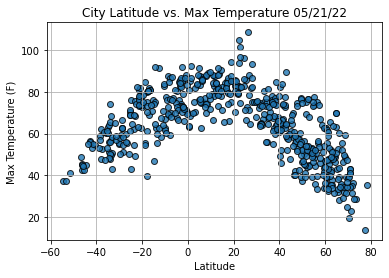

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

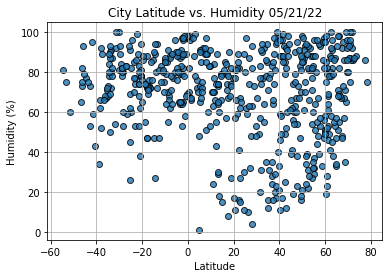

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

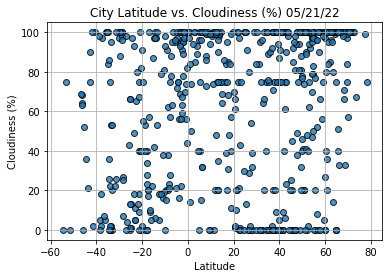

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()